In [1]:
import pandas as pd

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv', header=1, delimiter = ';') #TODO

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [12]:
#TODO
print(df.info())
print('AGE mean = ', df['AGE'].mean())
print('BILL_AMT1 max = ', df['BILL_AMT1'].max())
df[['AGE', 'default payment next month', 'BILL_AMT1']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

,AGE,default payment next month,BILL_AMT1
count,30000.000000,30000.000000,30000.000000
mean,35.485500,0.221200,51223.330900
std,9.217904,0.415062,73635.860576
min,21.000000,0.000000,-165580.000000
25%,28.000000,0.000000,3558.750000
50%,34.000000,0.000000,22381.500000
75%,41.000000,0.000000,67091.000000
max,79.000000,1.000000,964511.000000


In [13]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
df[df['SEX'] == 2][df['EDUCATION'] == 2]['ID'].count()

D:\ML\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


8656

In [16]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
# способ 1
df.groupby('default payment next month').median().filter(regex='^PAY_|^BILL_')

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [17]:
# способ 2
df.groupby('default payment next month').median().loc[:,list(map(lambda x: ('PAY_' in x) or ('BILL_'  in x),list(df.columns)))]

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [48]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(index = ['MARRIAGE','SEX'],
               columns=['EDUCATION'], 
               values = 'ID', 
               aggfunc = 'count', 
               margins = True, 
               fill_value = '')
#TODO

EDUCATION      0        1        2       3    4    5   6      All
MARRIAGE SEX                                                     
0        1            1.0      1.0    12.0                   14.0
         2            3.0      5.0    32.0                   40.0
1        1     2   1690.0   2370.0  1048.0   18   48  14   5190.0
         2     2   2032.0   4472.0  1813.0   34  102  14   8469.0
2        1     6   2633.0   2940.0   894.0   23   46  11   6553.0
         2     4   4176.0   4080.0  1015.0   45   81  10   9411.0
3        1           30.0     63.0    36.0    1    1        131.0
         2           20.0     99.0    67.0    2    2   2    192.0
All           14  10585.0  14030.0  4917.0  123  280  51  30000.0

In [22]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

def my_func(col):
    if col <=10000:
        return 'A'
    elif col <=100000:
        return 'B'
    elif col <=200000:
        return 'C'
    elif col <=400000:
        return 'D'
    elif col <=700000:
        return 'E'
    else:
        return 'F'
    
df['NewColumn'] = df['LIMIT_BAL'].map(my_func)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,NewColumn
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,B
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,C
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,B
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,B
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,B


In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

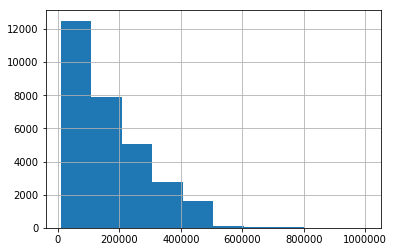

In [25]:
df['LIMIT_BAL'].hist() #TODO

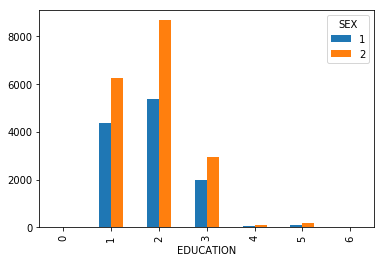

In [65]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
df #TODO

In [ ]:
# Считаю, что задание выше сформулировано некорректно!
# В примере вы построили распределение числа людей по образованию для каждого пола. 
# И в случае распределения неважно, какой параметр использовать: ID или LIMIT_BAL. Примеры ниже:

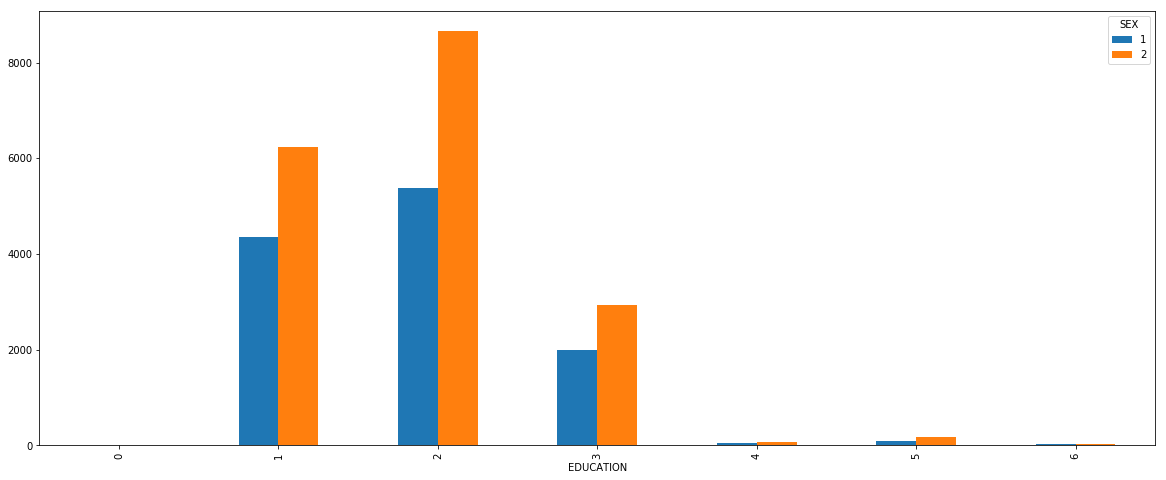

In [44]:
# от ID
fig, ax = plt.subplots(figsize=(20,8))
df.pivot_table('ID', 'EDUCATION', 'SEX',  'count').plot(kind='bar', ax=ax)

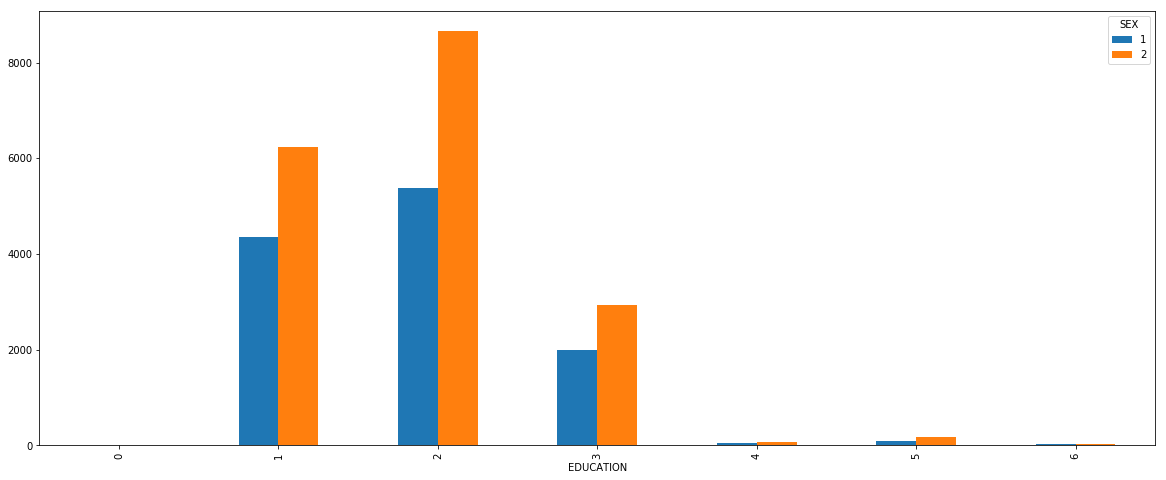

In [34]:
# от LIMIT_BAL. Этот график не показывает зависимость.
# График говорит, что женщин, взявших кредит, больше, чем мужчин, по каждой группе с одинаковым уровнем образования
fig, ax = plt.subplots(figsize=(20,8))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX',  'count').plot(kind='bar', ax=ax)

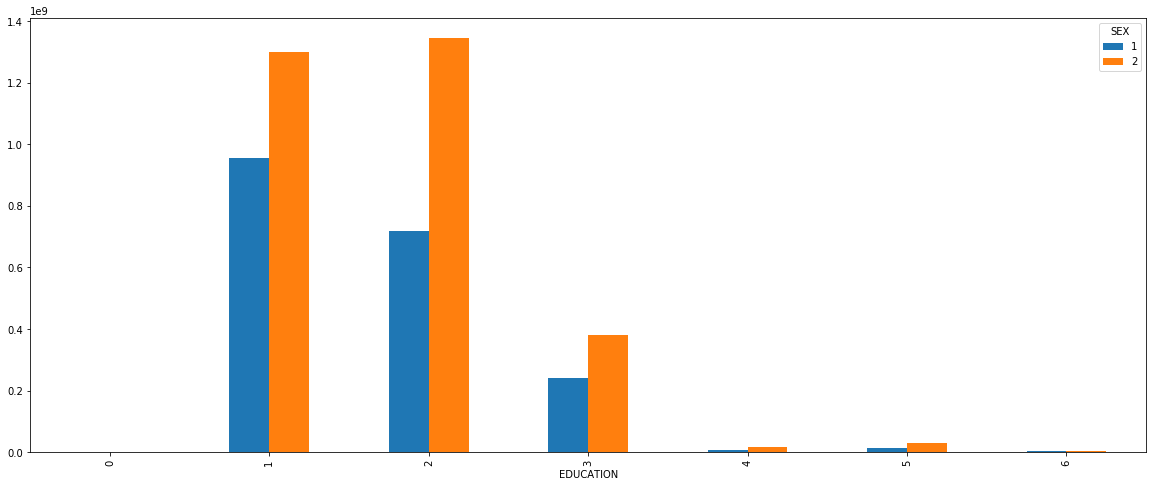

In [56]:
# попробовала переформулировать задание "постройте зависимость общей суммы кредитного лимита от образования для каждого пола"
fig, ax = plt.subplots(figsize=(20,8))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX',  'sum').plot(kind='bar', ax=ax)
# на графике видно, что общая сумма кредитных лимитов у женщин выше, чем у мужчин

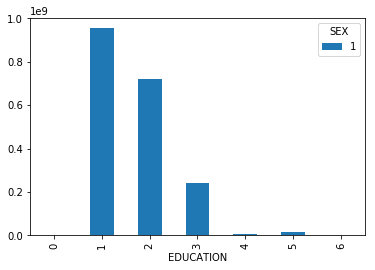

In [57]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
# переформулировала: "постройте распределение общей суммы кредитного лимита по образованию для мужчин:
d = df[df['SEX'] == 1]
d.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX',  'sum').plot(kind='bar')

In [4]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO

In [77]:
cols = list(df.columns)
print(cols)
print(cols[1:4])

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'NewColumn']
['LIMIT_BAL', 'SEX', 'EDUCATION']


D:\ML\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


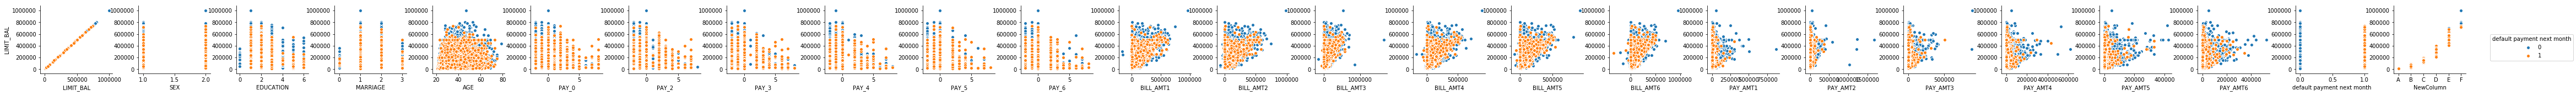

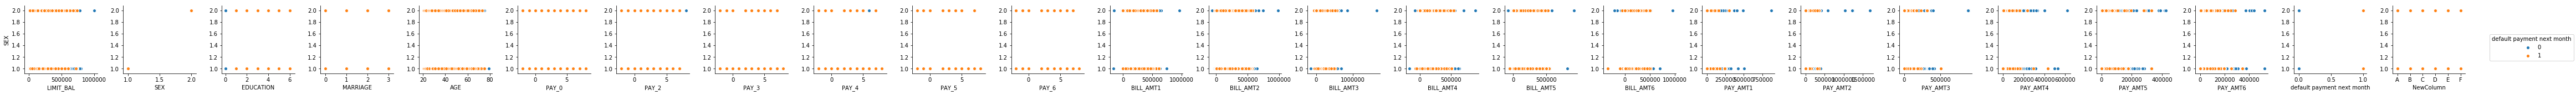

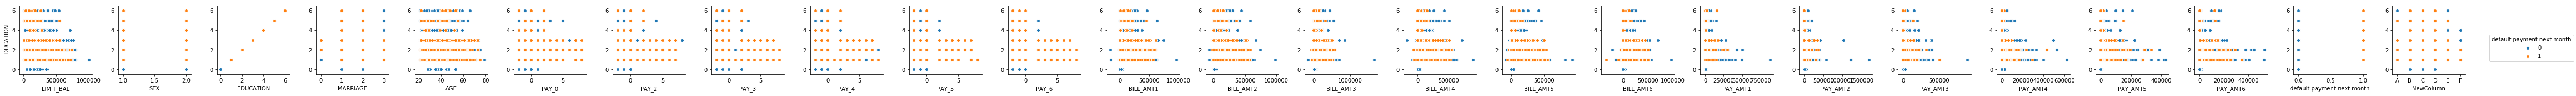

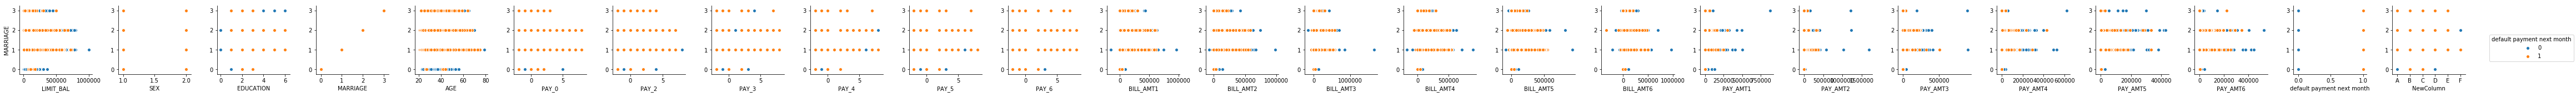

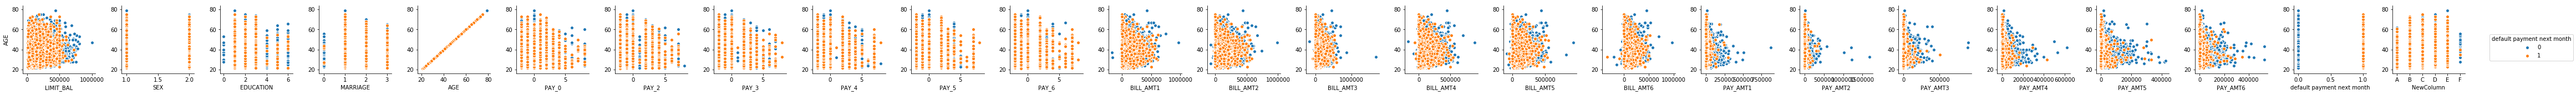

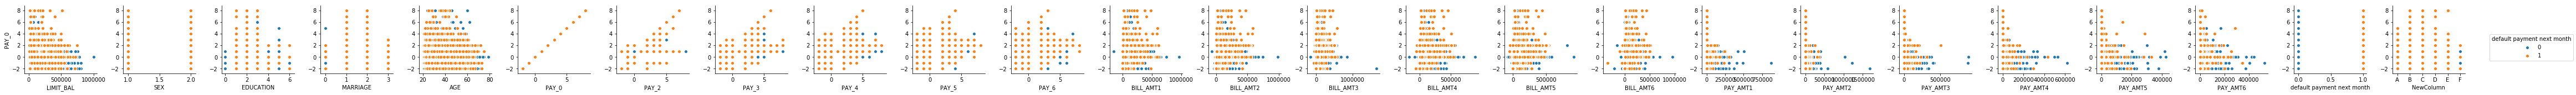

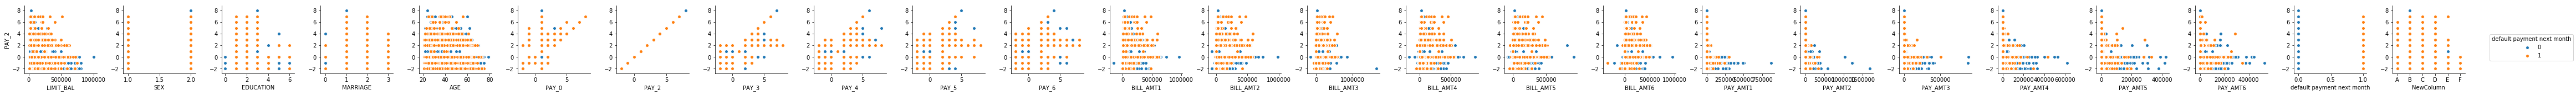

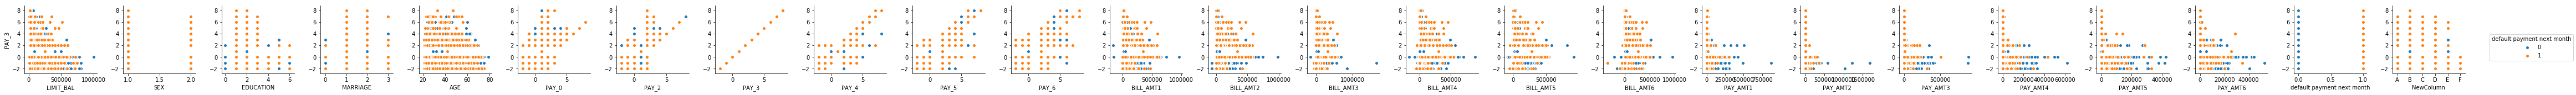

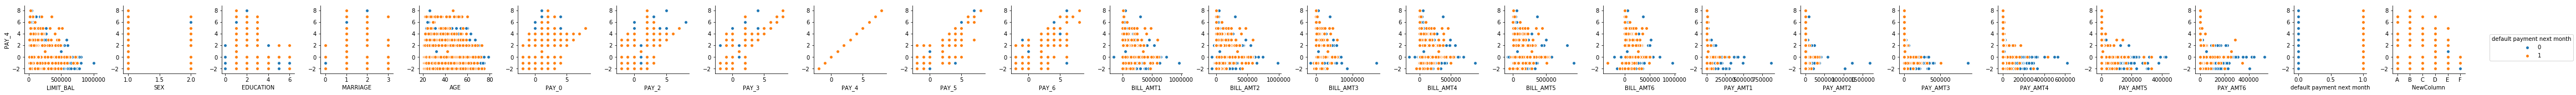

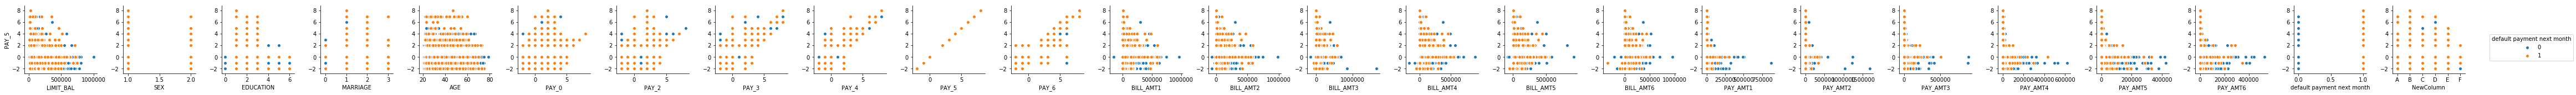

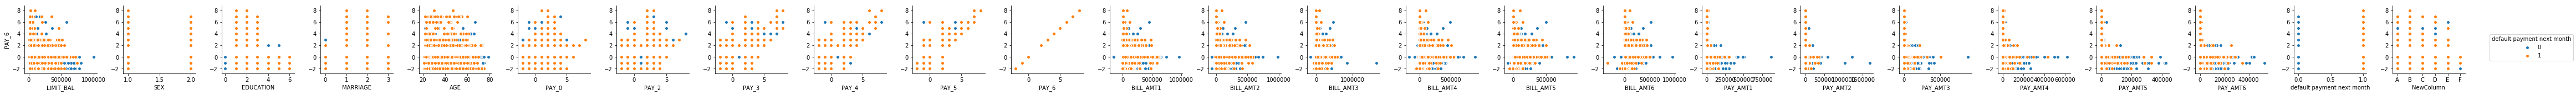

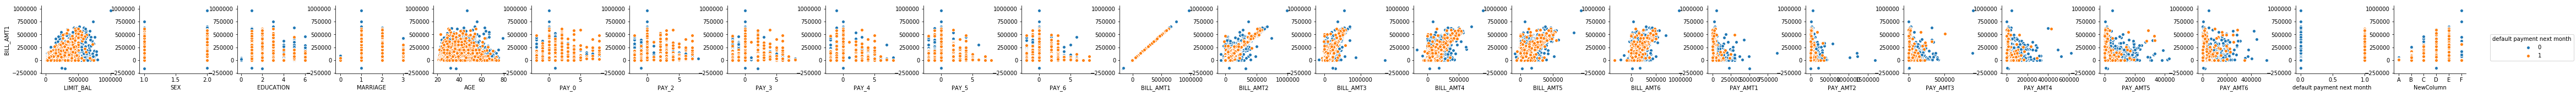

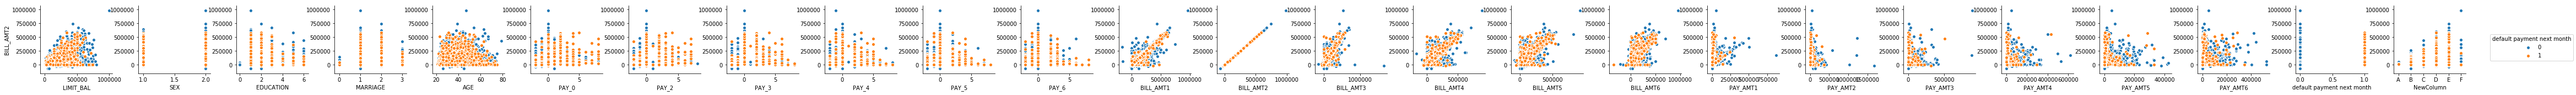

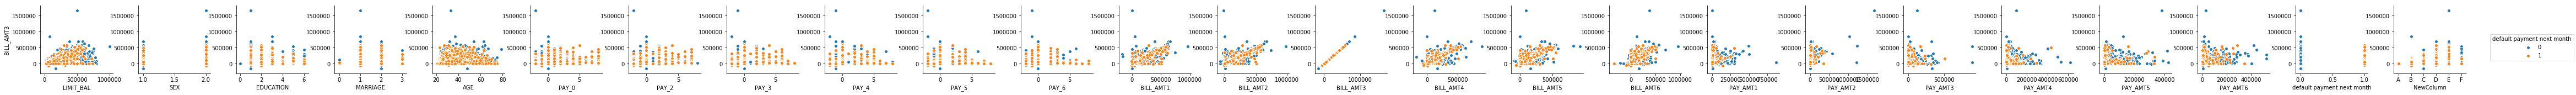

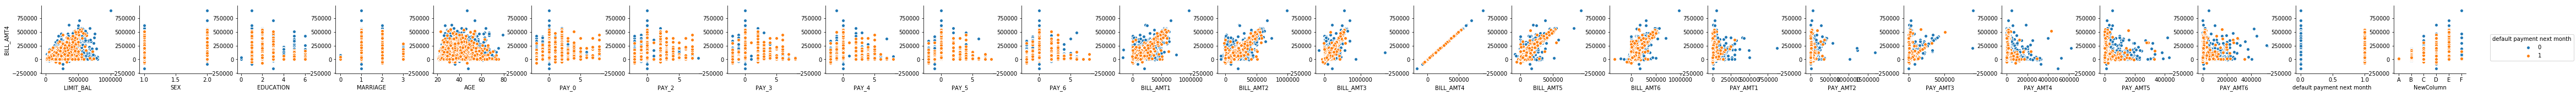

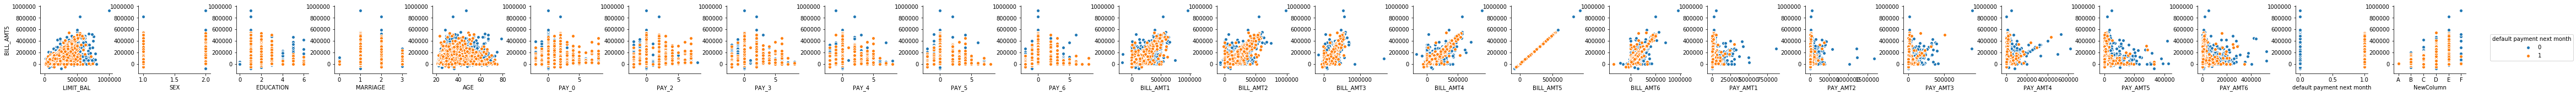

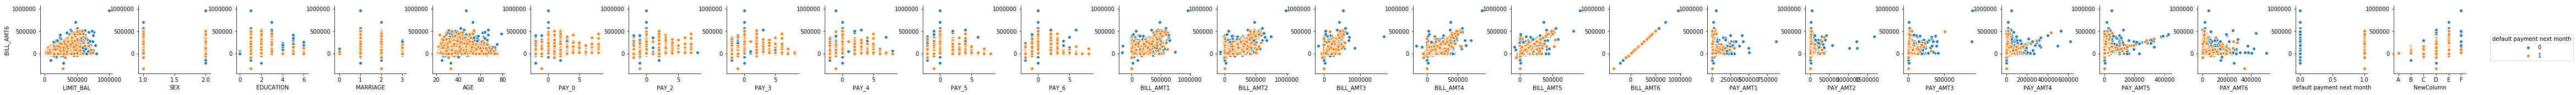

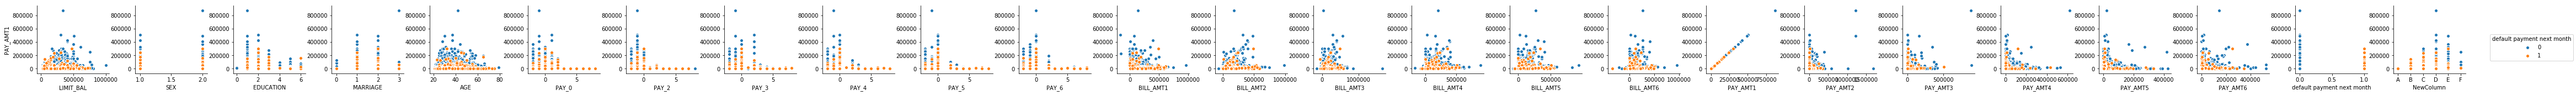

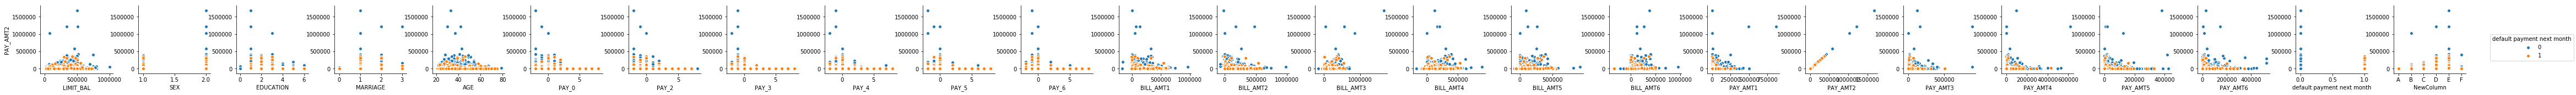

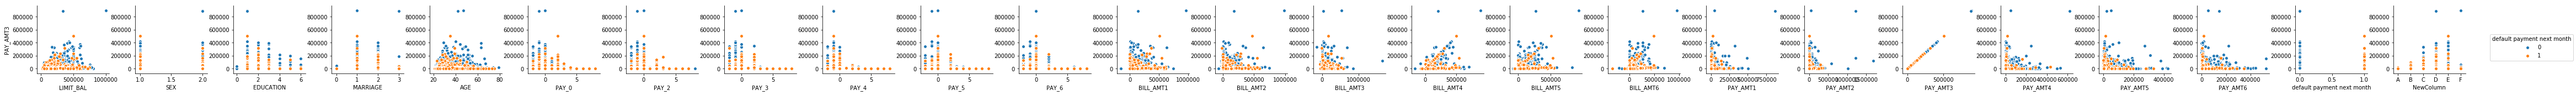

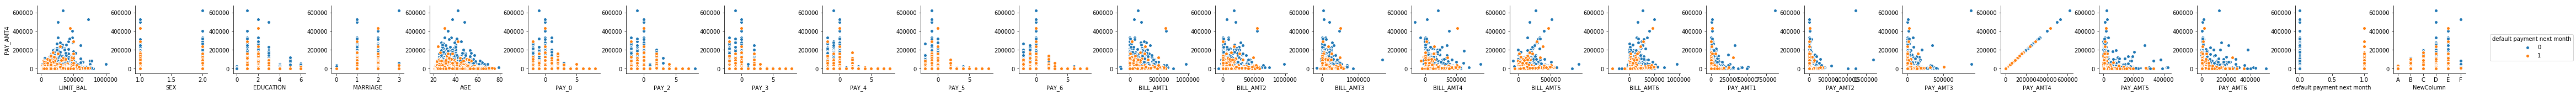

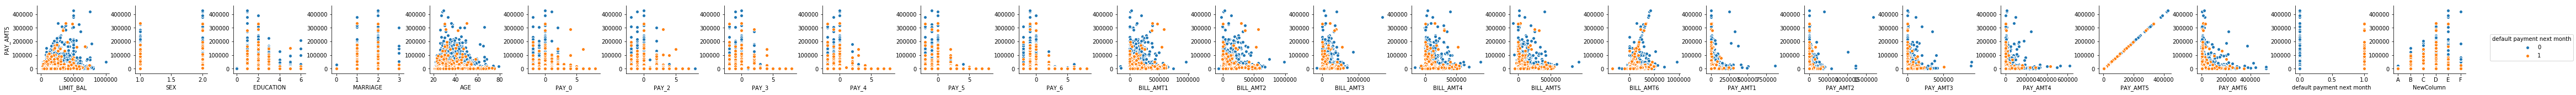

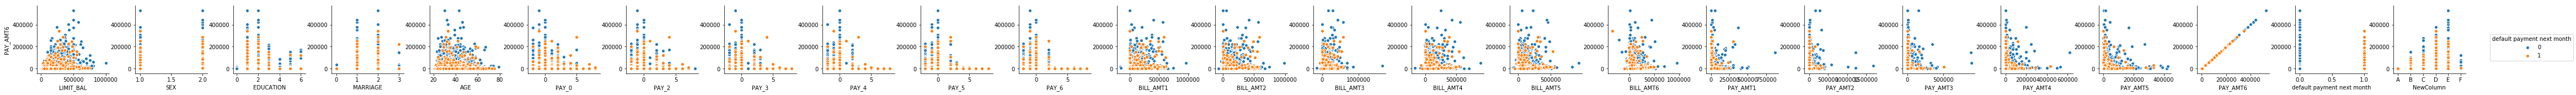

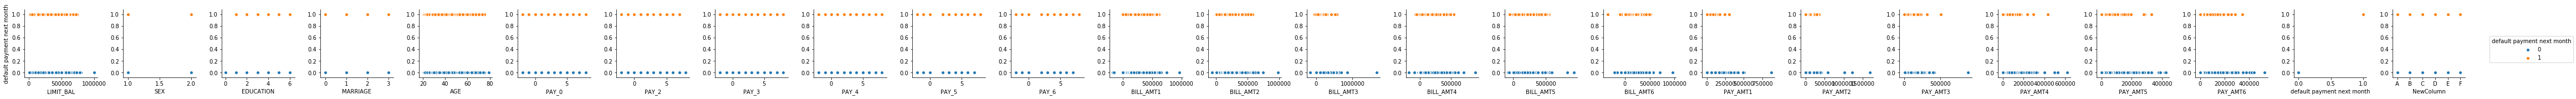

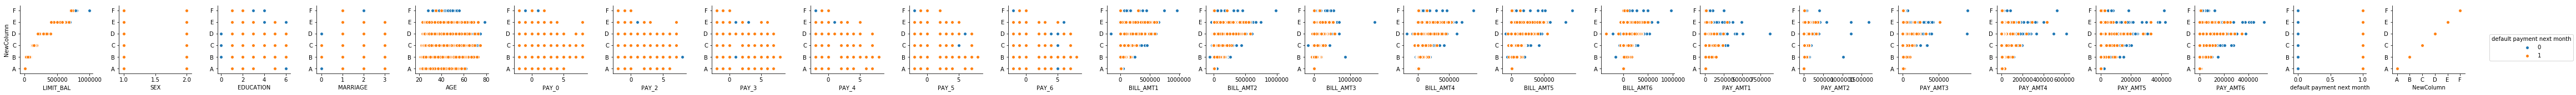

In [78]:
for col in cols[1:]:
    g = sns.pairplot(df, 
                 x_vars=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'NewColumn'],
                 y_vars=[col],
                 hue='default payment next month')